# Landmanbot survey results

In [58]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [59]:
# import file
df_raw = pd.read_excel('../surveyResults.xls', sheetname='Landmanbot')
df_raw.head(3)

,ID de la réponse,Date de soumission,Dernière page,Langue de départ,Avez-vous utilisé Landmanbot -,Avez-vous trouvé les informations que vous cherchiez -,La qualité des réponses et du service vous a-t-elle convenu - [],Auriez-vous préféré une expérience plus libre ou plus guidée -,Aves-vous des remarques ou des suggestions d'amélioration -,Pourquoi n'avez-vous pas utilisé Landmanbot -,Qu'est-ce qu'il manque pour que vous l'utilisiez -
0,13,1980-01-01 00:00:00,1,fr,Oui,Oui,5.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
1,14,1980-01-01 00:00:00,1,fr,Non,NaN,NaN,NaN,NaN,98zh87z,NaN
2,15,NaN,1,fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# rename columns
df_edt = df_raw.rename(index=str, columns={"ID de la réponse": "id"
                                                  , "Date de soumission": "date"
                                                  , "Dernière page": "lastPage"
                                                  , "Langue de départ": "language"
                                                  , "Avez-vous utilisé Landmanbot -": "usedBot"
                                                  , "Avez-vous trouvé les informations que vous cherchiez -": "infoFound"
                                                  , "La qualité des réponses et du service vous a-t-elle convenu - []":"ansQuality"
                                                  , "Auriez-vous préféré une expérience plus libre ou plus guidée -":"moreGuided"
                                                  , "Aves-vous des remarques ou des suggestions d'amélioration -":"remarks"
                                                  , "Pourquoi n'avez-vous pas utilisé Landmanbot -":"whyNotUseBot"
                                                  , "Qu'est-ce qu'il manque pour que vous l'utilisiez -":"missingToUseBot"})
df_edt.head()

,id,date,lastPage,language,usedBot,infoFound,ansQuality,moreGuided,remarks,whyNotUseBot,missingToUseBot
0,13,1980-01-01 00:00:00,1,fr,Oui,Oui,5.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
1,14,1980-01-01 00:00:00,1,fr,Non,NaN,NaN,NaN,NaN,98zh87z,NaN
2,15,NaN,1,fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,1980-01-01 00:00:00,1,fr,Oui,Oui,6.0,Plus libre (je peux parler à Landmanbot presqu...,Ptoif,NaN,NaN
4,17,1980-01-01 00:00:00,1,fr,Oui,Oui,6.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN


In [66]:
df_edt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 109
Data columns (total 11 columns):
id                 110 non-null int64
date               20 non-null object
lastPage           110 non-null int64
language           110 non-null object
usedBot            20 non-null object
infoFound          18 non-null object
ansQuality         19 non-null float64
moreGuided         19 non-null object
remarks            8 non-null object
whyNotUseBot       1 non-null object
missingToUseBot    0 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 10.3+ KB


In [67]:
# drop rows with no datetime
df_edt.dropna(axis=0, how='any', thresh=None, subset=['date'], inplace=True)
df_edt.head()

,id,date,lastPage,language,usedBot,infoFound,ansQuality,moreGuided,remarks,whyNotUseBot,missingToUseBot
0,13,1980-01-01 00:00:00,1,fr,Oui,Oui,5.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
1,14,1980-01-01 00:00:00,1,fr,Non,NaN,NaN,NaN,NaN,98zh87z,NaN
3,16,1980-01-01 00:00:00,1,fr,Oui,Oui,6.0,Plus libre (je peux parler à Landmanbot presqu...,Ptoif,NaN,NaN
4,17,1980-01-01 00:00:00,1,fr,Oui,Oui,6.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
6,19,1980-01-01 00:00:00,1,fr,Oui,Oui,1.0,Plus libre (je peux parler à Landmanbot presqu...,ztjhe563,NaN,NaN


In [68]:
len(df_edt)

20

In [69]:
# replace oui/non/NaN with 1/0/-999.25
df_edt['usedBot'].replace(regex=True,inplace=True,to_replace='Oui',value='1')
df_edt['usedBot'].replace(regex=True,inplace=True,to_replace='Non',value='0')
df_edt['usedBot'].replace(regex=True,inplace=True,to_replace=np.nan,value='-999.25')
df_edt['infoFound'].replace(regex=True,inplace=True,to_replace='Oui',value='1')
df_edt['infoFound'].replace(regex=True,inplace=True,to_replace='Non',value='0')
df_edt['infoFound'].replace(regex=True,inplace=True,to_replace=np.nan,value='-999.25')

In [70]:
df_edt.head()

,id,date,lastPage,language,usedBot,infoFound,ansQuality,moreGuided,remarks,whyNotUseBot,missingToUseBot
0,13,1980-01-01 00:00:00,1,fr,1,1,5.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
1,14,1980-01-01 00:00:00,1,fr,0,-999.25,NaN,NaN,NaN,98zh87z,NaN
3,16,1980-01-01 00:00:00,1,fr,1,1,6.0,Plus libre (je peux parler à Landmanbot presqu...,Ptoif,NaN,NaN
4,17,1980-01-01 00:00:00,1,fr,1,1,6.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
6,19,1980-01-01 00:00:00,1,fr,1,1,1.0,Plus libre (je peux parler à Landmanbot presqu...,ztjhe563,NaN,NaN


In [71]:
df_edt.nunique()

id                 20
date                1
lastPage            1
language            1
usedBot             2
infoFound           3
ansQuality          5
moreGuided          2
remarks             8
whyNotUseBot        1
missingToUseBot     0
dtype: int64

In [72]:
# fractions of each value
#df_edt[df_edt['answQuality'] == 4]
fracs = pd.value_counts(df_edt['ansQuality'].values, sort=False)
fracs

5.0    8
6.0    5
1.0    1
4.0    3
2.0    2
dtype: int64

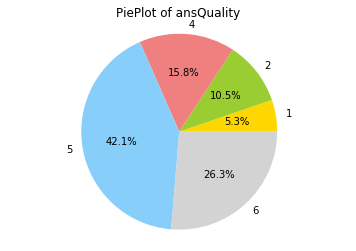

In [73]:
# pieplot of ansQuality
# Data to plot
labels = '1','2','4','5','6'
sizes = [1,2,3,8,5]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgrey']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=0)

plt.title('PiePlot of ansQuality')
plt.axis('equal')
plt.show()


In [76]:
df_edt.head()

,id,date,lastPage,language,usedBot,infoFound,ansQuality,moreGuided,remarks,whyNotUseBot,missingToUseBot
0,13,1980-01-01 00:00:00,1,fr,1,1,5.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
1,14,1980-01-01 00:00:00,1,fr,0,-999.25,NaN,NaN,NaN,98zh87z,NaN
3,16,1980-01-01 00:00:00,1,fr,1,1,6.0,Plus libre (je peux parler à Landmanbot presqu...,Ptoif,NaN,NaN
4,17,1980-01-01 00:00:00,1,fr,1,1,6.0,Plus libre (je peux parler à Landmanbot presqu...,NaN,NaN,NaN
6,19,1980-01-01 00:00:00,1,fr,1,1,1.0,Plus libre (je peux parler à Landmanbot presqu...,ztjhe563,NaN,NaN


In [82]:
# nb of respondants who used bot
countUsedBot = len(df_edt[(df_edt['usedBot'] == '1')])
countUsedBot

19

In [83]:
# nb of respondants who found info
countInfoFound = len(df_edt[(df_edt['infoFound'] == '1')])
countInfoFound

17

In [119]:
# counts for each vote
countAnsQual_1 = len(df_edt[(df_edt['ansQuality'] == 1)])
countAnsQual_2 = len(df_edt[(df_edt['ansQuality'] == 2)])
countAnsQual_3 = len(df_edt[(df_edt['ansQuality'] == 3)])
countAnsQual_4 = len(df_edt[(df_edt['ansQuality'] == 4)])
countAnsQual_5 = len(df_edt[(df_edt['ansQuality'] == 5)])
countAnsQual_6 = len(df_edt[(df_edt['ansQuality'] == 6)])
inputList = countAnsQual_1,countAnsQual_2,countAnsQual_3,countAnsQual_4,countAnsQual_5,countAnsQual_6
inputList

(1, 2, 0, 3, 8, 5)

In [80]:
# check total must = 19
countAnsQual_1+countAnsQual_2+countAnsQual_3+countAnsQual_4+countAnsQual_5+countAnsQual_6

19

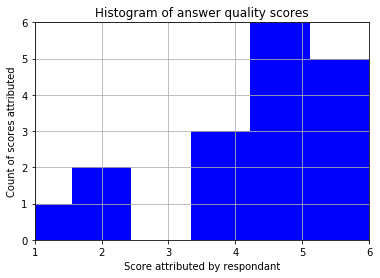

In [175]:
# histogram of results
# results to nd.array
x = np.asarray([[1],[ 1, 1],[], [1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
ind = (1.025,1.05,1.075,1.1,1.125,1.150)
n, bins, patches = plt.hist(x, 6, facecolor='b')
plt.xlabel('Score attributed by respondant')
plt.xticks(ind, ('1','2','3','4','5','6'))
plt.ylabel('Count of scores attributed')
plt.title('Histogram of answer quality scores')
plt.axis([1.025, 1.15, 0, 6])
plt.grid(True)
plt.show()

In [191]:
df_edt.iloc[1:2]

,id,date,lastPage,language,usedBot,infoFound,ansQuality,moreGuided,remarks,whyNotUseBot,missingToUseBot
1,14,1980-01-01 00:00:00,1,fr,0,-999.25,NaN,NaN,NaN,98zh87z,NaN


In [194]:
df_edt['moreGuided'][9]

'Plus guidée (Landmanbot me propose des messages/questions que je peux choisir)'

In [197]:
plusGuide = len(df_edt[(df_edt['moreGuided'] == 'Plus guidée (Landmanbot me propose des messages/questions que je peux choisir)')])
plusLibre = len(df_edt[(df_edt['moreGuided'] == 'Plus libre (je peux parler à Landmanbot presque comme à un humain)')])

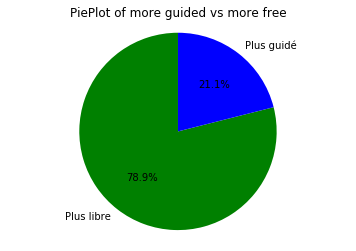

In [208]:
# more guided vs more free
# pieplot of moreGuided
# Data to plot
labels = 'Plus libre','Plus guidé'
sizes = [plusLibre,plusGuide]

colors = ['g', 'b']
explode = (0, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.title('PiePlot of more guided vs more free')
plt.axis('equal')
plt.show()
